# ASSIGNMENT 7

We will be investigating the use of Polynomial Regression on the function y = x3. We want to add some randomness to x3, so we will add a fraction of a random value selected from a normal distribution with a standard deviation of 1 centered around 0: 

y = x**3 + 0.5 * np.random.normal(0,1,1)

In [9]:
from random import randint
import numpy as num
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import math 
from math import sqrt

In [10]:
def func(x):
    return x**3 + 0.5 * num.random.normal(0,1,1)

print(func(10))

[999.44084088]


# 1. Test Points

Make a list of 10 random points between -2 and 2 (using a uniform distribution). Pass this list into the function described above to get a set of x and y coordinates. Display the (x,y) coordinates as a data frame.

In [19]:
func_test = num.vectorize(func)
num.random.seed(100)
xaxis = num.sort(num.random.uniform(-2,2,10))
yaxis = func_test(xaxis)
print("X coordinates")
print(xaxis)
print()
print("Y coordinates")
print(yaxis)

X coordinates
[-1.98112458 -1.51372352 -1.45317364 -0.88652246 -0.30192964  0.17361977
  0.30037332  0.68299634  1.30341102  1.37910453]

Y coordinates
[-7.64812515 -3.69749732 -2.85110484 -0.98853509  0.38089918  0.34159397
 -0.02510465  0.05296668  2.72920563  2.4038915 ]


# 2. Create Graphs

Now, create scatter plots of the (x,y) coordinates and:

a degree 1 (linear) regression model, 

There should be 5 separate graphs for this step each clearly labeled and annotated.

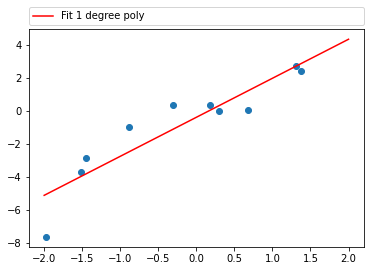

In [20]:
x2 = num.linspace(-2,2)
m = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', linear_model.LinearRegression())])
m =m.fit(xaxis[:,np.newaxis], yaxis[:,np.newaxis])
y2 = m.predict(x2[:, num.newaxis])
plt.scatter(xaxis, yaxis)
plt.plot(x2, y2, 'r', label="Fit "+str(1)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
plt.show()


degree 2 (quadratic) regression model, 


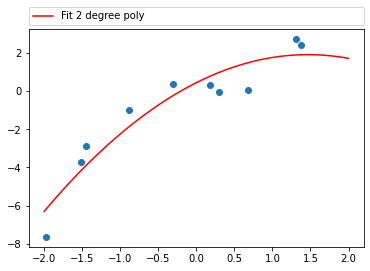

In [21]:
x3 = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', linear_model.LinearRegression())])
x3 =x3.fit(xaxis[:,num.newaxis], yaxis[:,num.newaxis])
y3 = x3.predict(x2[:, num.newaxis])
plt.scatter(xaxis, yaxis)
plt.plot(x2, y3, 'r', label="Fit "+str(2)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
plt.show()


degree 3 (cubic) regression model, 
 

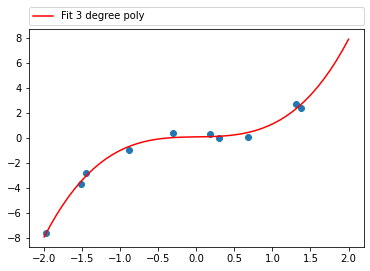

In [22]:
x4 = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', linear_model.LinearRegression())])
x4 =x4.fit(xaxis[:,num.newaxis], yaxis[:,num.newaxis])
y4 = x4.predict(x2[:, num.newaxis])
plt.scatter(xaxis, yaxis)
plt.plot(x2, y4, 'r', label="Fit "+str(3)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
plt.show()


degree 5, and 


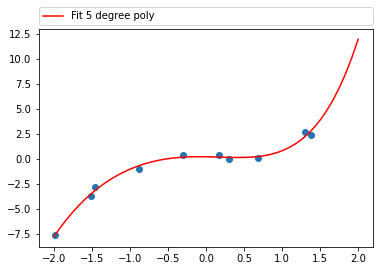

In [23]:
x5 = Pipeline([('poly', PolynomialFeatures(degree=5)),('linear', linear_model.LinearRegression())])
x5 =x5.fit(xaxis[:,num.newaxis], yaxis[:,num.newaxis])
y5 = x5.predict(x2[:, num.newaxis])
plt.scatter(xaxis, yaxis)
plt.plot(x2, y5, 'r', label="Fit "+str(5)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
plt.show()


degree 9.

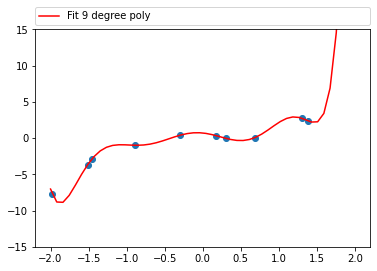

In [24]:
x6 = Pipeline([('poly', PolynomialFeatures(degree=9)),('linear', linear_model.LinearRegression())])
x6 =x6.fit(xaxis[:,num.newaxis], yaxis[:,num.newaxis])
y6 = x6.predict(x2[:, num.newaxis])
plt.scatter(xaxis, yaxis)
plt.plot(x2, y6, 'r', label="Fit "+str(9)+ " degree poly")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
plt.ylim(-15,15)
plt.show()

# 3.Combine Graphs

Next, create a single graph that contains all 5 regression models from the last step as well as the (x,y) coordinates. Make sure there is a useful legend as well.



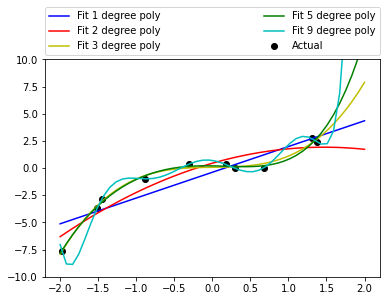

In [25]:
plot_config=['b', 'r', 'y', 'g', 'c']
plt.scatter(xaxis, yaxis, color = 'black', marker = 'o', label="Actual")
d_degree = [1,2,3,5,9]
i = 0
for degree in d_degree:
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)),('linear', linear_model.LinearRegression())])
    model=model.fit(xaxis[:,num.newaxis], yaxis[:,num.newaxis])
    predict_sk=model.predict(x2[:,np.newaxis])
    plt.plot(x2, predict_sk, plot_config[i], label="Fit "+str(degree)+ " degree poly")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
               ncol=2, mode="expand", borderaxespad=0.)
    plt.ylim(-10,10)
    i = i+1

plt.show()

# 4. Test the Models

We want to see which model was the best predictor for our function. Which one do you think would be the best? To figure this out, create a set of 100 x coordinates randomly generated from a uniform distribution between -2 and 2. Then generate the corresponding y coordinates by passing in the x’s to the x3 + (degree of randomness) function from earlier. Display the first few (x,y) coordinates to make sure they are what you expect.



In [26]:
X_test = num.random.uniform(-2,2,100)
y_test = func_test(X_test)
print("X values")
print(X_test)
print()
print("Y values")
print(y_test)

X values
[-1.97724597e+00 -9.90294586e-01  1.18265003e+00 -1.93898012e+00
  3.95373508e-01  4.15218156e-01 -1.57940926e+00 -4.72226220e-01
 -1.85409577e+00  1.56164625e+00  1.92368343e+00 -1.76023204e+00
  1.56218378e+00  3.07605998e-01  9.69918756e-01  5.20735746e-01
  3.27368770e-01 -1.91824347e+00 -1.15989369e+00  1.78739513e-01
  1.07646068e+00 -9.97219083e-01 -8.56417238e-01  1.40958035e+00
  1.90002597e+00  1.53941317e+00 -5.61968624e-01  3.95435784e-01
 -5.80817553e-01 -6.39239139e-01 -1.28767604e+00 -1.04922317e+00
 -1.82055087e+00  2.17257185e-02 -4.94990183e-01  3.71221604e-01
  5.19767502e-01 -1.42959874e+00  1.73536520e+00  1.78551952e+00
  4.09186631e-01 -4.48934879e-01 -5.47247984e-01 -1.18261889e+00
 -8.92939754e-01 -1.01385648e+00 -1.30556799e+00  1.86643878e+00
  1.82805040e+00  3.91894737e-01  9.25203012e-01 -6.38459109e-01
 -1.63177759e+00 -1.46007924e-01  3.47955730e-02 -1.64615931e+00
  1.12140893e-01  1.96863215e+00 -4.19856273e-01 -6.57614233e-01
  1.22180215e+00

# 5. The Results



To find the best model, we compare the root mean square error for each polynomial regression model. The model with the lowest error is the best!



In [27]:
y_pred1 = m.predict(X_test[:, np.newaxis])
r1 = sqrt(mean_squared_error(y_test,y_pred1))
print('Root mean square error for Degree 1')
print(r1)

y_pred2 = x3.predict(X_test[:, np.newaxis])
r2 = sqrt(mean_squared_error(y_test,y_pred2))
print('Root mean square error for Degree 2')
print(r2)

y_pred3 = x4.predict(X_test[:, np.newaxis])
r3 = sqrt(mean_squared_error(y_test,y_pred3))
print('Root mean square error for Degree 3')
print(r3)

y_pred5 = x5.predict(X_test[:, np.newaxis])
r5 = sqrt(mean_squared_error(y_test,y_pred5))
print('Root mean square error for Degree 5')
print(r5)

y_pred9 = x6.predict(X_test[:, np.newaxis])
r9 = sqrt(mean_squared_error(y_test,y_pred9))
print('Root mean square error for Degree 9')
print(r9)

"""Cubic regression is best because Degree 3:cubic regression has the lowest root mean square error among the others.""" 

Root mean square error for Degree 1
1.4902410023308104
Root mean square error for Degree 2
1.8292871801491593
Root mean square error for Degree 3
0.5385454583069078
Root mean square error for Degree 5
1.0665111079926206
Root mean square error for Degree 9
12.374312194587901


'Cubic regression is best because Degree 3:cubic regression has the lowest root mean square error among the others.'